In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#
import sklearn

%matplotlib inline

In [2]:
print(f'numpy: {np.__version__}, pandas: {pd.__version__}, matplotlib: {matplotlib.__version__}, seaborn: {sns.__version__}, sklearn: {sklearn.__version__}')

numpy: 1.24.3, pandas: 2.0.3, matplotlib: 3.7.2, seaborn: 0.12.2, sklearn: 1.3.0


In [3]:
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('data.csv')
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
55,85759902,B,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,...,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036,NaN
554,924632,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242,NaN
123,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,...,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Удилить колонки 'id' и 'Unnamed: 32'
df = df.drop(labels=['id', 'Unnamed: 32'], axis='columns')
#df.info()

In [6]:
# Проверить есть ли ячейки со значением NaN
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Считаем метрики для колонок с числами
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


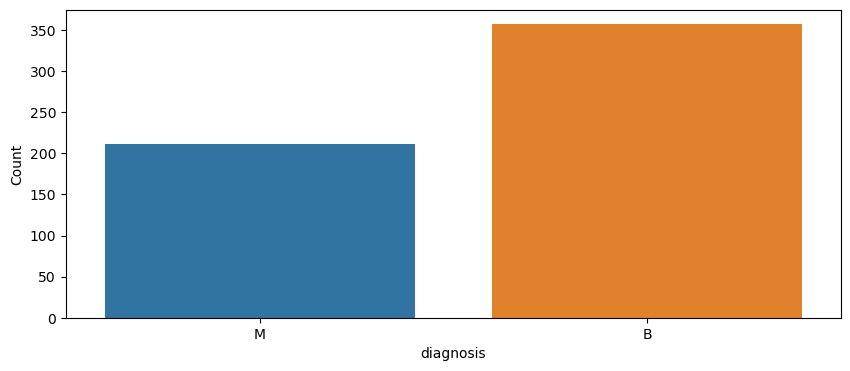

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: количество строк по категориям в колонке 'diagnosis'
sns.countplot(data=df, x='diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count');

In [9]:
# Считаем попарную корреляцию месжду признаками
df.corr(numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


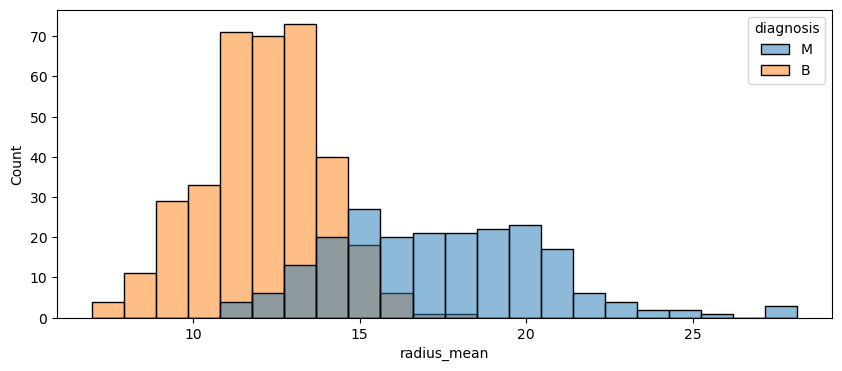

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
sns.histplot(data=df, x='radius_mean', hue='diagnosis');

In [11]:
# Либо я не понял задание 3, но строить такие графики, для каждой переменной явно излишне.
# pairplot для 30 переменных тоже НЕ вариант

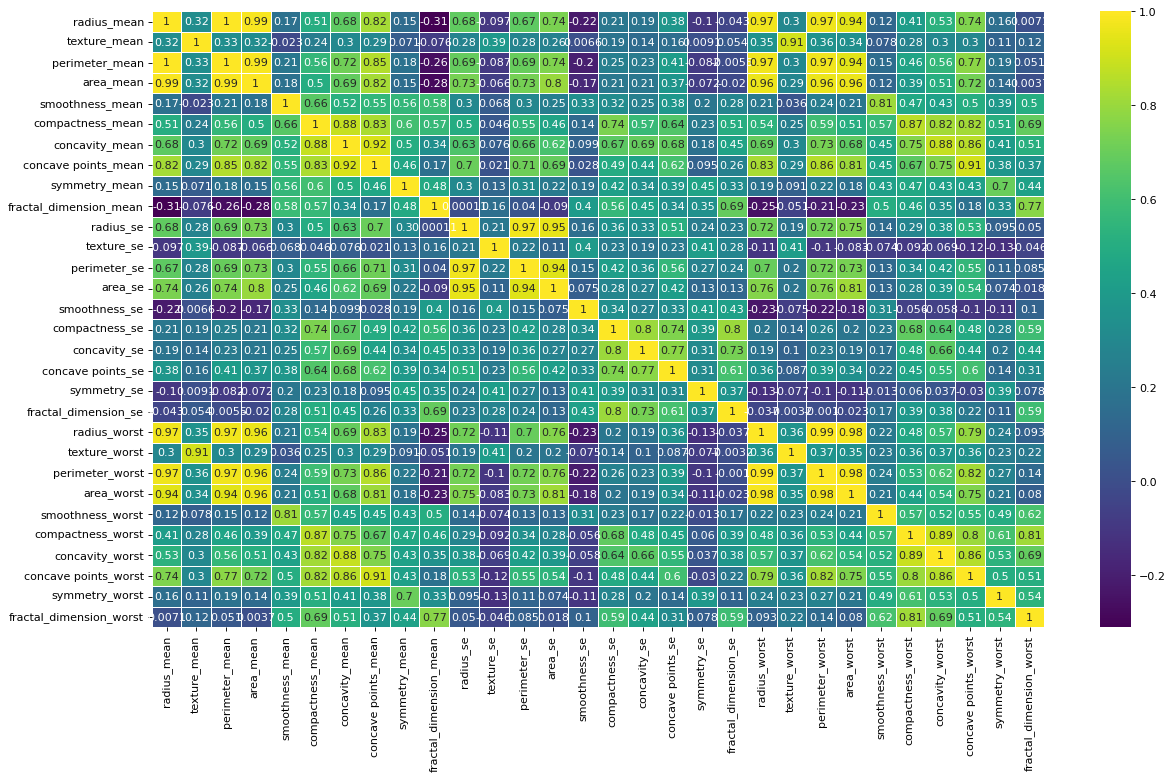

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10), dpi=80)
# Строим график тепловой карты (корреляция между числовыми признаками)
sns.heatmap(
    #data=df,
    data=df.corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    cmap='viridis'
);

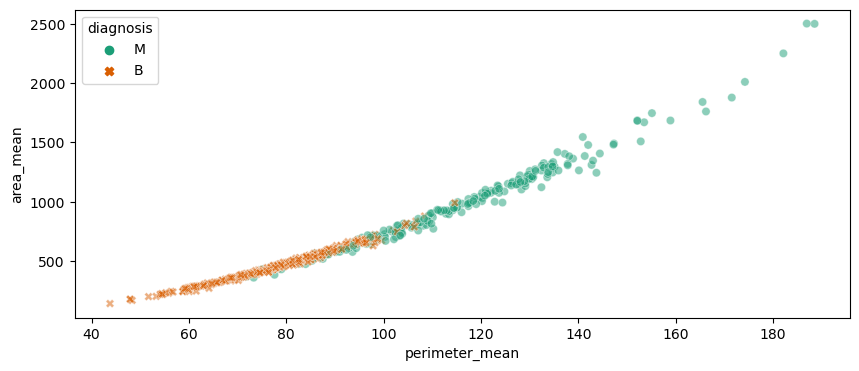

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Для примера возьмем признаки area_mean и perimeter_mean - построим для них график scatterplot
sns.scatterplot(data=df, x='perimeter_mean', y='area_mean', hue='diagnosis', style='diagnosis', alpha=0.5, palette='Dark2');

D:\ProgramFiles\Python\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\ProgramFiles\Python\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


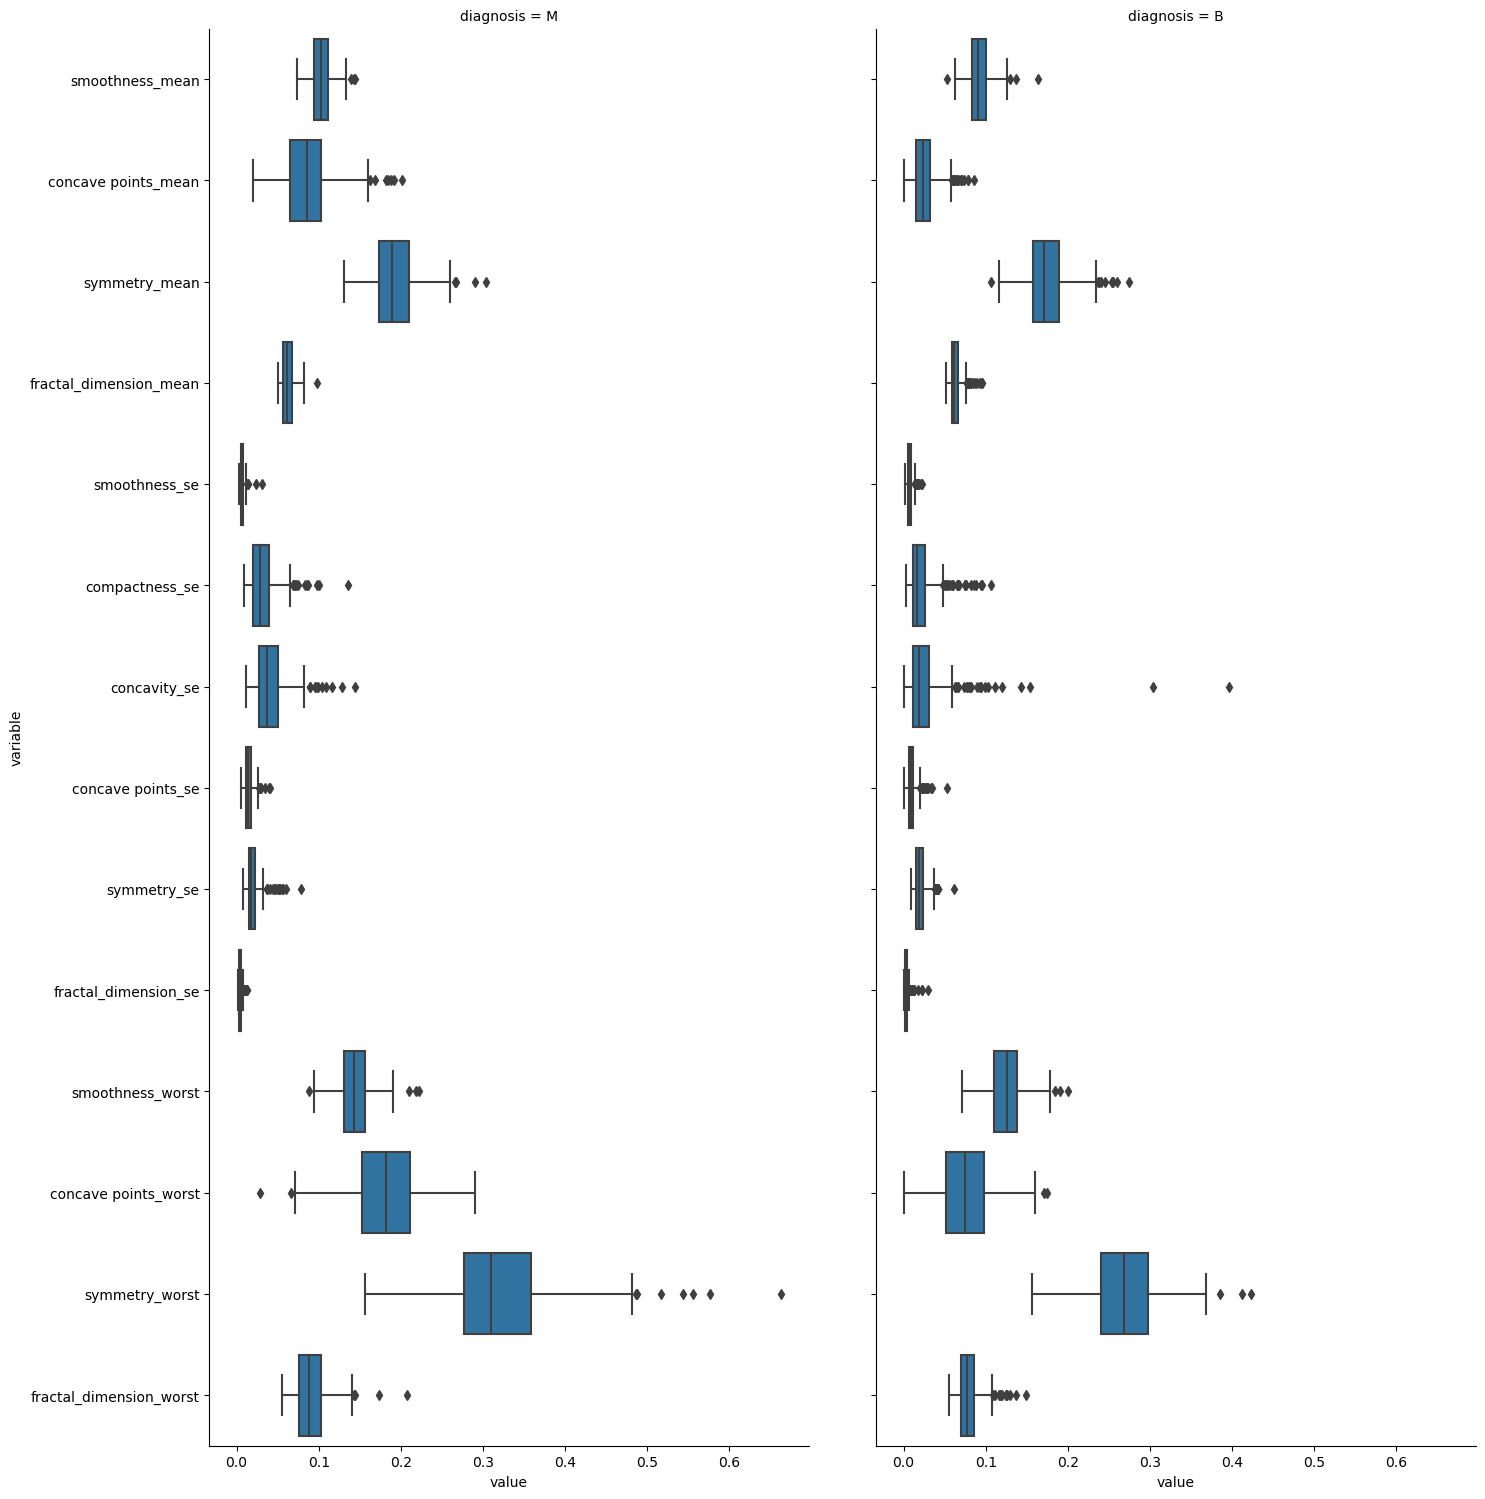

In [14]:
features = [
    'area_mean', 'area_worst', 'area_se', 'perimeter_mean', 'perimeter_worst', 'perimeter_se',
    'texture_mean', 'texture_worst', 'texture_se', 'radius_mean', 'radius_worst', 'radius_se',
    'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst'
]

g = sns.FacetGrid(pd.melt(df.drop(features, axis='columns'), id_vars='diagnosis'), col='diagnosis')
g.map(sns.boxplot, 'value', 'variable')

g.fig.set_figwidth(20.5)
g.fig.set_figheight(20.5)

In [15]:
# На графике не видно, но наиболее удобно отделить злокачественные новообразования от доброкачественных,
# по признакм перечисленным в списке features. Данные признаки имеют наибольший разброс, и их значения
# сдвинуты относительно целевой переменной.

In [16]:
# Получить только текстовые колонки из DataFrame'a (целевую переменную)
myObjectDf = df.select_dtypes(include='object')
#print(myObjectDf); print()

# Получить все колонки исключая текстовые из DataFrame'a
myNumericDf = df.select_dtypes(exclude='object')
#print(myNumericDf); print()

# Создать из категориальных переменных Dummy переменные (one hot encoding)
myDummiesDf = pd.get_dummies(myObjectDf, drop_first=True)

for col in myDummiesDf.columns:
    tmp = myDummiesDf[col].apply(int)
    myDummiesDf[col] = tmp

dfTargetAsDigital = pd.concat([myNumericDf, myDummiesDf], axis=1)
#dfTargetAsDigital

In [17]:
# Вычисляем корреляцию между признаками и колонкой 'diagnosis_M'
targetCorr = dfTargetAsDigital.corr()['diagnosis_M']
targetCorr = targetCorr.sort_values()
# Исключить строки 'diagnosis_M' и 'diagnosis_B'
targetCorr = targetCorr.iloc[1:-1]
#targetCorr

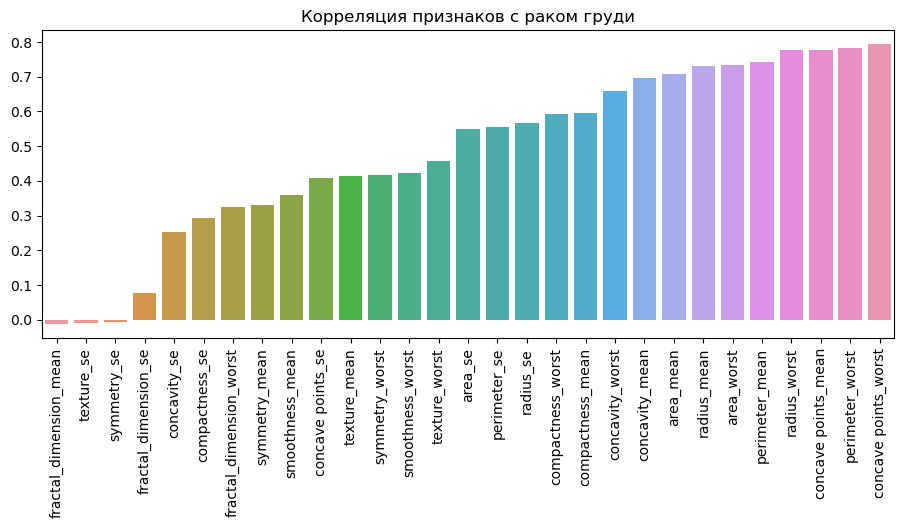

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 4), dpi=100)
# Строим график: значения корреляции между переменными и колонкой 'diagnosis_M'
sns.barplot(x=targetCorr.index, y=targetCorr.values)
axes.set_title('Корреляция признаков с раком груди')
plt.xticks(rotation=90);

In [19]:
# На графике хорошо видно, что половина признаков имеет корреляцию > 0.5 с целевой переменной.
# Можно пробовать обучить модель.